# Theory Basics: the qubit

This notebook is for beginners! :D Those who are interested in quantum computing but have minimal to no experience. It's <strong>part one</strong> of the Theory Basics series, which is all about the basics of how quantum computing works. Here, I cover <strong>qubits</strong>—the basic unit of information in quantum computing.

#### Prerequisites:
* Familiar with python (e.g. functions, classes, methods, math operations)
* Familiar with jupyter notebooks (know how to run and get around a jupyter notebook)
* Proficient in algebra

If you meet these prereqs, great! :D If not, this notebook may cause confusion or even discourage you from learning more about quantum computing, which is the exact <strong>opposite</strong> of what I intend. I <strong>strongly</strong> encourage you to familiarize yourself with those topics before going on.

Let's dive in!

#### Qiskit
To get started, you'll need to [install qiskit](https://qiskit.org/documentation/install.html#install). Qiskit is IBM's open source python library for quantum computing. It has everything you need to execute established quantum algorithms (e.g. QAOA, VQE), make your own algorithms, and use simulated or <strong>real</strong> quantum computers. There are other open source quantum computing libraries out there with access to <strong>real</strong> quantum computers. I prefer qiskit to its ease of access to quantum computers and its large community. I won't cover the details of qiskit here. If you want to learn more, <strong>definitely</strong> go through their "getting started" [tutorials](https://github.com/Qiskit/qiskit-iqx-tutorials/blob/master/qiskit/1_start_here.ipynb).

In [1]:
# This may take a few seconds
import numpy as np
import pandas as pd
from qiskit import *  # this imports all of qiskit's sublibraries
import matplotlib.pyplot as plt

# The Qubit

The [qubit](https://www.epiqc.cs.uchicago.edu/1qubit) is a quantum [bit](https://en.wikipedia.org/wiki/Bit). (quantum bit —> qubit? Physics jokes, am I right? XD) A qubit has two distinct <strong>states</strong> 0 and 1—just like it's classical companion the bit. What distinguishes a qubit from a bit is (obviously) the <strong>quantum</strong> part! The quantum part of a qubit follows different rules than a bit. The rules are called quantum mechanics, and if you're clever, they <em>can</em> (but not always) lead to <strong>EXPONENTIALLY</strong> faster computation than a computer using bits. Thus, the appeal for making quantum computers.

#### The Quantum Circuit (with a Hadamard gate)
To work with qubits in qiskit, we start with a <strong>quantum circuit</strong>. The <strong>quantum circuit</strong> as the place <strong>where qubits live</strong> and where you can <strong>manipulate them</strong> (by appling <strong>gates</strong>—more on this later). Let's make a simple circuit with one qubit and one gate.

In [2]:
# Code a Quantum Circuit

# the argument (1,1) tells qiskit you want 1 qubit ("q_0") and 1 classical bit ("c_0")
circuit = QuantumCircuit(1,1)
# this method applies the Hadamard gate to the 0th qubit ("q_0")
circuit.h(0)
# this method measures the 0th qubit ("q_0") and stores the outcome in the 0th classical bit ("c_0")
circuit.measure(0,0)
# Visualize the constructed circuit
circuit.draw()

You just created a quantum computing code. How cool!! :D

Let's take a moment and discuss what happened. We initialized one qubit and one classical bit by calling ```QuantumCircuit(1,1)```. That's the "q_0:" and "c_0:" part of the drawing above. In qiskit, all qubits are initialized to 0 represented by the "|0>" part of the drawing. Why the need for a classical bit you ask? When the qubit is measured, the result needs to be stored somewhere. The classical bit is where the measurement result is stored. In some experiments you may not need a classical bit to companion every qubit because you don't intent of measure every qubit. (Sometimes, the qubits and they're bit companions are referred to as quantum and classical registers.) Next, we manipulated the qubit with a [Hadamard gate](https://en.wikipedia.org/wiki/Quantum_logic_gate#Hadamard_(H)_gate)—the box with the "H" in it. Last of all, we have to measure the qubit! Measurement is represented in qiskit by an "M" in a box with double lines going down to the qubit's companion bit.

Just like any code, after you write it you execute it! Let's run the circuit on a simulated quantum computer to see what happens.

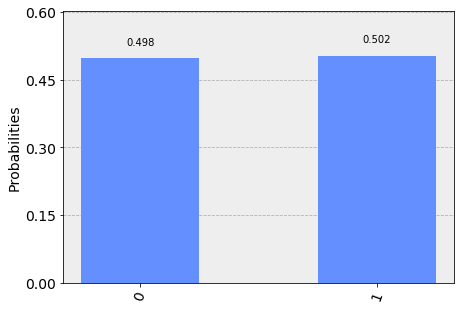

In [3]:
# Execute a Quantum Circuit and View Results

# Initialize a simulated quantum computer
backend = BasicAer.get_backend('qasm_simulator')
# Execute quantum circuit from the previous cell with a chosen quantum computer "backend" and number of repetitions "shots"
result = execute(circuit, backend, shots=10000).result()
# Extract classical bit result
counts = result.get_counts(circuit)
# Show counts as histogram
visualization.plot_histogram(counts)

The above histogram shows the qubit probability (e.g. .45 meaning 45%) on the vertical axis with the qubit state label (0 or 1) on the horizontal axis.

Knowing the qubit started in the 0 state, can you tell what the Hadamard gate does?

Based on this result, we see it randomly assigns the incoming 0 state to 0 ~50% of the time and 1 the other ~50%. What about when we input the 1 state through the Hadamard gate? To change the 0 state to a 1 state, we use the X or NOT gate. The X gate "nots" the input; since there is only the options of 0 and 1, not-0 is 1 and not-1 is 0. To put a 1 in the Hadamard gate, we'll first us the X gate then the Hadamard like so...

In [4]:
# Code a Quantum Circuit

circuit = QuantumCircuit(1,1)
circuit.x(0)  # this method applies the X (or NOT) gate to the 0th qubit ("q_0")
circuit.h(0)
circuit.measure(0,0)
circuit.draw()

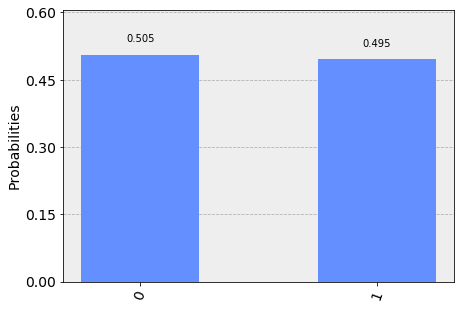

In [5]:
# Execute a Quantum Circuit and View Results

result = execute(circuit, backend, shots=10000).result()
counts = result.get_counts(circuit)
visualization.plot_histogram(counts)

The Hadamard gate takes in 1 and randomly outputs 0 and 1 with even probability—just like what it did to 0!

#### Two Hadamard Gates
What if we add a second Hadamard gate? If our guess about what a Hadamard gate does is right, then an incoming qubit in state 0 would be randomly assigned to 0 or 1 by the first Hadamard gate. If a 0 is assigned when it goes into the second Hadamard gate, it will come out 0 or 1 with even probability. If a 1 is assigned when it goes into the second Hadamard gate, we'll also see a 0 or 1 with even probability. Ultimately, we'd see the same 50% 0 and 50% 1 at the output again. Let's try it!

In [6]:
# Code a quantum circuit

circuit = QuantumCircuit(1,1) 
circuit.h(0)  # first Hadamard gate
circuit.h(0)  # second Hadamard gate
circuit.measure(0,0)
circuit.draw()

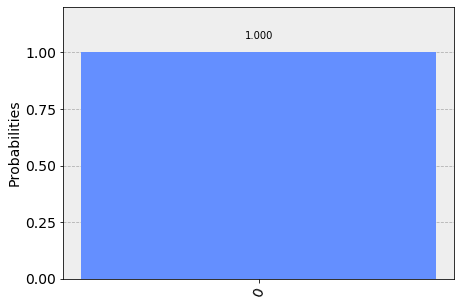

In [7]:
# Execute a Quantum Circuit and View Results

result = execute(circuit, backend, shots=10000).result()
counts = result.get_counts(circuit)
visualization.plot_histogram(counts)

100% 0 is <strong>NOT what we expected</strong>. (What if we had input a 1 into the two Hadamard gates? Insert your own code to see what happens.) How is that possible? We should have seen 50% 0 and 50% 1. If a single Hadamard gate randomly assigned the 0 state to 0 or 1, did the second Hadamard know which states were coming from the first Hadamard gate and purposefully counteract the random assignments? But, "purposefully" counteracting is the opposite of random, which is the known behavior of a single Hadamard gate! This is not explainable with normal logic. <strong>Welcome to quantum weirdness.</strong>

What if—somehow—there is some mysterious communication between the two gates (as contrived a hypothesis as that is)? If we peak between the two gates, maybe we can see what's going on. At least, we can make sure the qubit is randomly 0 or 1 after the first gate. We'll assign the measurement after the first Hadamard gate to classical bit 0 ("c_0") and the second measurement to classical bit 1 ("c_1").

In [8]:
# Code a Quantum Circuit

circuit = QuantumCircuit(1,2)  # the argument (1,1) tells qiskit you want 1 qubit and 2 classical bits
circuit.h(0)
circuit.measure(0,0)  # measurement after first Hadamard gate stored in c_0
circuit.h(0)
circuit.measure(0,1)  # measurement after second Hadamard gate stored in c_1
circuit.draw()  # Visualize the constructed circuit

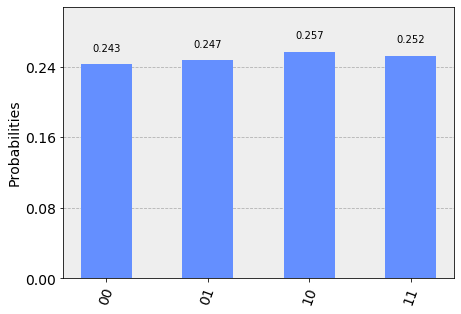

In [9]:
# Execute a Quantum Circuit and View Results

result = execute(circuit, backend, shots=10000).result()
counts = result.get_counts(circuit)
visualization.plot_histogram(counts)

This is obviously very different from the previous two Hadamard gate circuit, but all we did was "peak" between the gates with a measurement!

#### Untangling Multi-Bit Results
When more than one classical bit is used, the two (or more) are put next together like "00" or "11". The 0 or 1 in the <strong>far right</strong> digit place is classical bit c_0; the next digit to the left is classical bit c_1. To find the probability of the 0 state in the <strong>first</strong> measurement, we add the probabilities for "00" and "10" because the first digit (on the right) are 0's. That gives ~50%. To find the probability for the 1 state in the <strong>first</strong> measurement, we add "01" and "11" to get ~50% again! For the <strong>second</strong> measurement we follow the same procedure: "00" + "01" gives ~50% for 0 and "10" + "11" gives ~50% for 1.

Now that we understand how qiskit gives the results, we see the qubit is 50% 0 and 50% 1 after the first Hadamard and 50% 0 and 50% 1 after the second Hadamard! Just what our logical intuition said the behavior <strong>SHOULD</strong> have been. What does this mean for this mysterious double Hadamard behavior? When we didn't measure between, the output state of the circuit is the same as we started with. If we do measure between the two gates, they act like as their usual individual selves.

## Superposition
The conclusion scientists (and you) have come to is that the usual OR logic is not enough to explain the two Hadamard gate behavior. The Hadamard gate must be outputting a state that follows AND logic. A cool word scientists invented for this state is <strong>superposition</strong>. After a Hadamard gate, we say the qubit is in a "superposition of 0 and 1." You may have heard this state refered to as being 0 and 1, but this is wrong. To say the state is 0 and 1 implies 0 and 1 are not mutually exclusive, but by construction they are mutually exclusive; 0 is not-1 and 1 is not-0. It is a common (or lazy) enough mistake. Rather the superposition state the Hadamard gate output is a completely new state (i.e. the new word superposition) that follows completely new logic.